In [173]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

<h1>Exploratory Data Analysis</h1>

To train a model that is able to perform speech-to-text conversion we use the
*People's speech* dataset (https://mlcommons.org/en/peoples-speech/).
Exploratory data analysis is performed on the manifest file containing
attributes of the audio files, focussing on: - how fast people speak in our
dataset (words per second/minute); - sentence structure; - most frequent
words

In [174]:
DATA_DIR = Path("/home/bram/datasets")

df: DataFrame = pd.read_json(path_or_buf=DATA_DIR /
                             'flac_train_manifest.jsonl',
                             lines=True)

df = df.convert_dtypes(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46080 entries, 0 to 46079
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   audio_filepath  46080 non-null  string 
 1   duration        46080 non-null  Float64
 2   shard_id        46080 non-null  Int64  
 3   text            46080 non-null  string 
dtypes: Float64(1), Int64(1), string(2)
memory usage: 1.5 MB


In total we have over 46000 audio samples with their filepath, duration and
associated transcript

<h1>Task 1 | Distribution of speaking rate</h1>

How fast does each person talk in our audio samples?

                wpm
count  46080.000000
mean     164.692076
std       33.662831
min       17.647059
25%      141.891892
50%      163.934426
75%      185.822436
max      400.000000


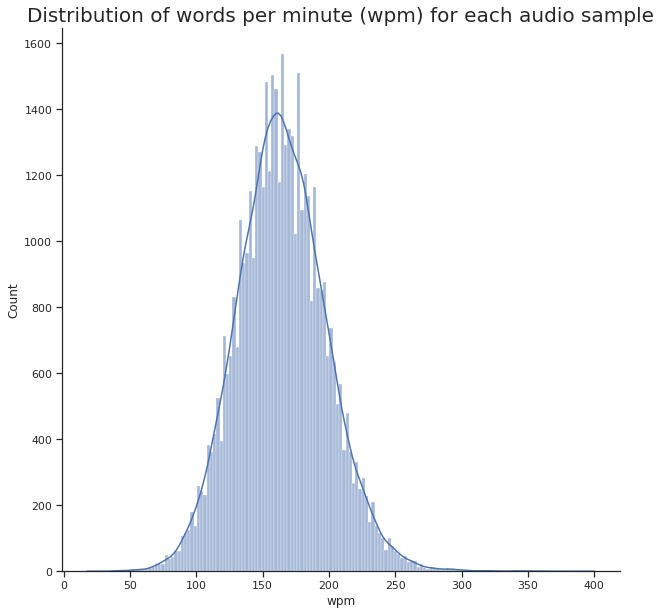

In [175]:
df["wordcount"] = df["text"].str.split().str.len()
df["wpm"] = (df["wordcount"] / df["duration"]) * 60

print(df[["wpm"]].describe())

plt.figure(figsize=(10, 10))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="notebook", style="ticks", rc=custom_params)
sns.histplot(df["wpm"], kde=True)
plt.title("Distribution of words per minute (wpm) for each audio sample",
          fontsize=20)
plt.show()

Above we calculate the words per minute of each speaker in our audio samples.
As we can see in the plot the average speed at which people talk is normally
distributed with an average of about 165 wpm. The average for speaking is
wihtin the 150-180 wpm range, which most of our data seems to be within.
Because of the above our dataset should be diverse enough for training.

<h1>Task 3 | Word cloud</h1>

What does the frequency of words within all texts look like?

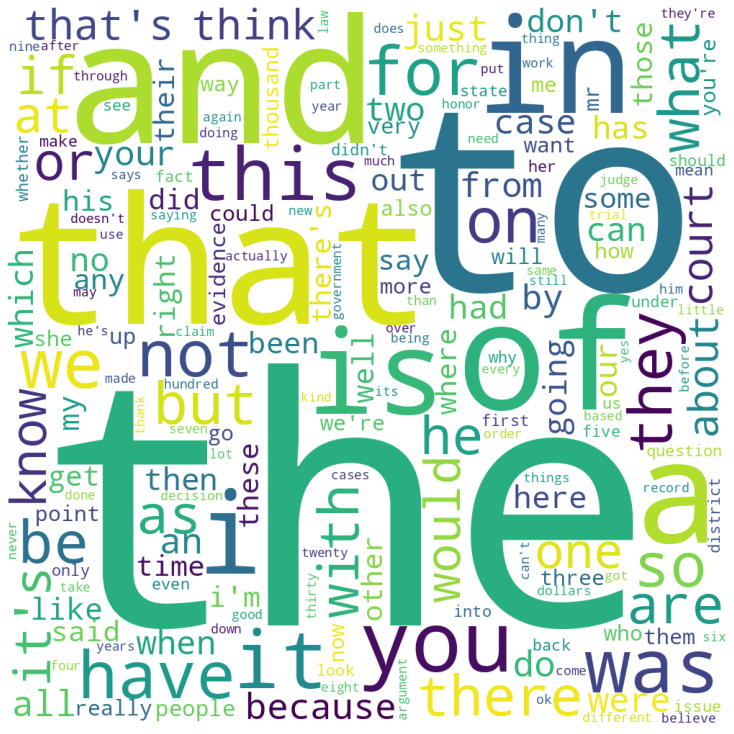

In [185]:
text_series = df["text"]

word_to_count: dict[str, int] = {}
word_to_freq: dict[str, int] = {}
word_count = 0

# fill dict containing counts
for text in text_series:
    words = text.split()
    word_count += len(words)
    for word in words:
        # if key is present, increment count
        if word in word_to_count.keys():
            word_to_count[word] += 1
        # else create it and set it to 1
        else:
            word_to_count[word] = 1

# fill dict containing frequencies
for k, v in word_to_count.items():
    word_to_freq[k] = v / word_count

# create wordcloud
wordcloud = WordCloud(width=1000,
                      height=1000,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate_from_frequencies(word_to_freq)

# plot the WordCloud image
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()